In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import patches
from matplotlib import ticker, cm

# Vectorized function and maximum radial value

In [22]:
def bfield(x,y,z):
    config = "helix_config_fitted.csv"
    field_str = os.popen("./BFIELD {} -c {} {} {}".format(config,x,y,z)).read()
    field_str_ary = field_str.split('\t')
    fieldMag = float(field_str_ary[-1].strip())
    return fieldMag

In [23]:
vbfield = np.vectorize(bfield)

In [42]:
maxr = 30

In [43]:
print(vbfield(0,0,maxr))
print(vbfield(0,maxr,0))
print(vbfield(maxr,0,0))

1.3378e-06
1.33826e-06
2.67853e-06


In [57]:
# field is strongest along the magnet axis... use that as radial coordinate
z = np.linspace(0,maxr,201)*0.3048
x = np.zeros(len(z))
y = np.zeros(len(z))

In [58]:
bx = vbfield(z,x,y)
by = vbfield(y,z,x)
bz = vbfield(x,y,z)

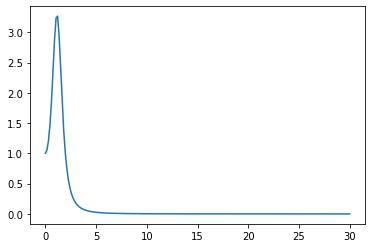

In [59]:
plt.plot(z/0.3048,bx)

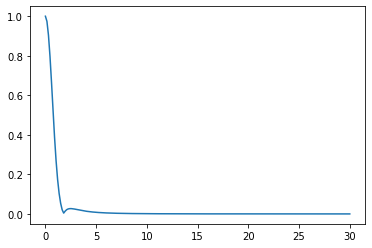

In [60]:
plt.plot(z/0.3048,by)

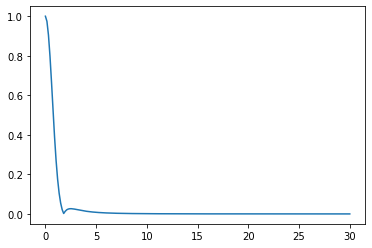

In [61]:
plt.plot(z/0.3048,bz)

In [62]:
maxb = bx

In [63]:
# point1 = 13
# point2 = 20
# dy = maxb[point2]-maxb[point1]
# dx = z[point2]-z[point1]
# for i in range(13,21):
#     maxb[i] = (dy/dx)*(z[i]-z[point1])+maxb[point2]
    

In [64]:
r = z/.3048

In [65]:
theta = np.linspace(0,2.01*np.pi,201)

In [66]:
rgrid,tgrid = np.meshgrid(r,theta)

In [67]:
xgrid = rgrid * np.cos(tgrid)
ygrid = rgrid * np.sin(tgrid)

In [68]:
bgrid,tgrid = np.meshgrid(maxb,theta)

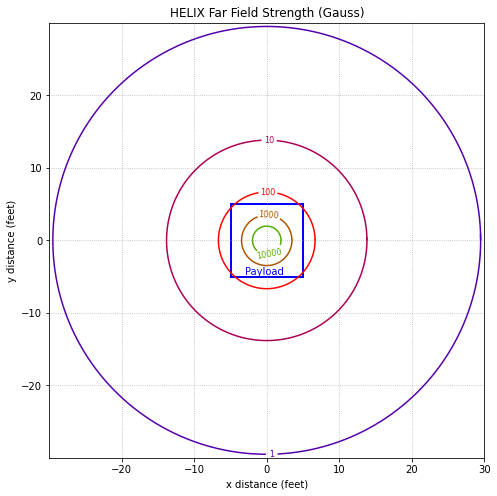

In [79]:
fig,ax = plt.subplots(figsize=(10,8))
contours = ax.contour(xgrid,ygrid,bgrid*1e4,locator=ticker.LogLocator(),cmap = cm.brg)
ax.clabel(contours, inline=True, fontsize=8, fmt = '%1.0f')
ax.set_aspect('equal')
plt.xlabel("x distance (feet)")
plt.ylabel("y distance (feet)")
plt.title("HELIX Far Field Strength (Gauss)")
plt.grid(True, linestyle=':')
rleft = -5
rbot = -5
rwid = 10
rht = 10
p = patches.Rectangle((rleft,rbot),rwid,rht,fill= None,ec='blue',lw=2)
ax.add_patch(p)
plt.text(-3,-4.8,"Payload",color="blue")
plt.show()
fig.savefig("20210611_green_hangar-field-v3.png",dpi=300)

In [84]:
contours.levels

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [90]:
contours.collections

<a list of 7 mcoll.LineCollection objects>

# Meshgrid solution

In [24]:
# make coordinate grid for hangar
x = np.linspace(-20,20,401)
z = np.linspace(-20,20,401)
X, Z = np.meshgrid(x,z)

In [6]:
XZ = np.column_stack((X.ravel(), Z.ravel()))

In [7]:
XYZ_df = pd.DataFrame({"X":XZ[:,0], "Y":np.zeros(XZ.shape[0]), "Z":XZ[:,1]})

In [9]:
XYZ_df.to_csv("20210611_hangar-coordinates.csv", header=False, index = False)

In [10]:
names = ["X","Y","Z","BX","BY","BZ"]

In [12]:
field_df = pd.read_csv("20210611_green_hangar-field.csv",names=names)

In [46]:
field_df

,X,Y,Z,BX,BY,BZ,B
0,-20.0,0,-20.0,7.987677e-07,1.001322e-08,0.000002,0.000003
1,-19.9,0,-20.0,7.926591e-07,1.008863e-08,0.000002,0.000003
2,-19.8,0,-20.0,7.863523e-07,1.016460e-08,0.000002,0.000003
3,-19.7,0,-20.0,7.798440e-07,1.024115e-08,0.000002,0.000003
4,-19.6,0,-20.0,7.731310e-07,1.031827e-08,0.000002,0.000003
...,...,...,...,...,...,...,...
160796,19.6,0,20.0,7.727542e-07,1.048446e-08,0.000002,0.000003
160797,19.7,0,20.0,7.794505e-07,1.040611e-08,0.000002,0.000003
160798,19.8,0,20.0,7.859425e-07,1.032835e-08,0.000002,0.000003
160799,19.9,0,20.0,7.922335e-07,1.025116e-08,0.000002,0.000003


In [17]:
field_df["B"] = np.sqrt(field_df["BX"]**2+field_df["BY"]**2+field_df["BZ"]**2)

In [25]:
indices = [i for i in range(401)]
ind_X,ind_Z = np.meshgrid(indices,indices)

In [35]:
ind_X,ind_Z = np.meshgrid(indices,indices)
ind_stack = np.column_stack((ind_X.ravel(), ind_Z.ravel()))

In [40]:
B = X-X

In [47]:
for i in range(len(ind_stack)):
    B[ind_stack[i,0], ind_stack[i,1]] = field_df["B"][i]

array([[2.52812734e-06, 2.55100112e-06, 2.57408916e-06, ...,
        2.57178082e-06, 2.54871040e-06, 2.52585415e-06],
       [2.54331955e-06, 2.56643915e-06, 2.58977693e-06, ...,
        2.58744527e-06, 2.56412543e-06, 2.54102369e-06],
       [2.55857145e-06, 2.58193914e-06, 2.60552900e-06, ...,
        2.60317381e-06, 2.57960223e-06, 2.55625273e-06],
       ...,
       [2.55604624e-06, 2.57938334e-06, 2.60294222e-06, ...,
        2.60256921e-06, 2.57901772e-06, 2.55568790e-06],
       [2.54080909e-06, 2.56389845e-06, 2.58720559e-06, ...,
        2.58683829e-06, 2.56353840e-06, 2.54045621e-06],
       [2.52563166e-06, 2.54847552e-06, 2.57153325e-06, ...,
        2.57117159e-06, 2.54812099e-06, 2.52528417e-06]])

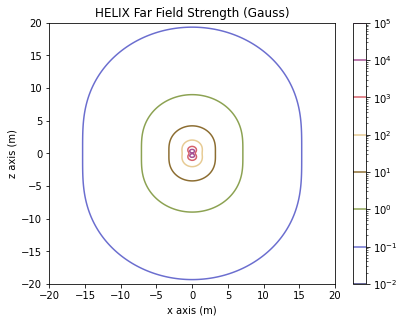

In [83]:
plt.contour(X,Z,B*1e4,20,locator=ticker.LogLocator(),cmap = cm.tab20b)
plt.colorbar()
plt.xlabel("x axis (m)")
plt.ylabel("z axis (m)")
plt.title("HELIX Far Field Strength (Gauss)")
plt.savefig("20210611_green_HELIX-far-field.png", dpi = 400)